<h1>TAREA 11</h1>
<h2>Sergio Alejandro Diaz Pinilla</h2>
<h2>Julian Camilo Mendez Corredor</h2>
<br>
<br>

<li>Implementar,en python,el algoritmo prara KDA</li>
<li>Evaluar los algoritmos PCA,LDA,KPCA y KDA,en la reduccin de la dimensin de los vectores de caractersticas de su proyecto.</li>

<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; F. Prieto </h1>


Listo


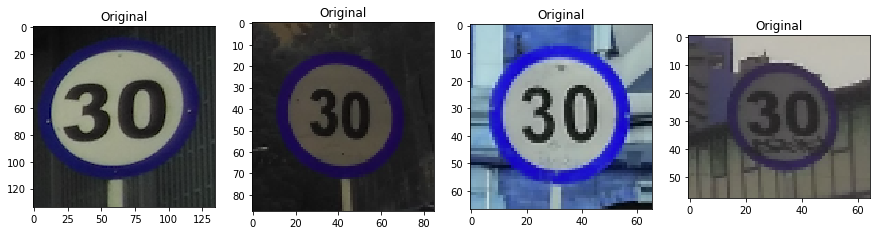

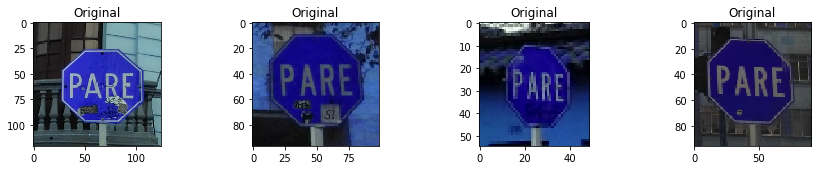

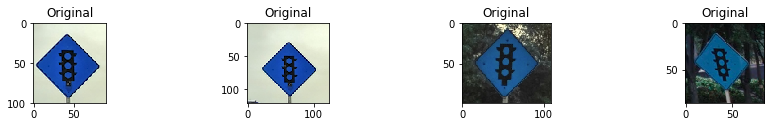

In [26]:
%matplotlib inline
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division
from numpy import linalg as LA
sign = cv2.imread('Fig/Sign/v1.png',1)
sign2 = cv2.imread('Fig/Sign/v2.png',1)
sign3 = cv2.imread('Fig/Sign/v3.png',1)
sign4 = cv2.imread('Fig/Sign/v4.png',1)

sign5 = cv2.imread('Fig/Sign/p1.png',1)
sign6 = cv2.imread('Fig/Sign/p2.png',1)
sign7 = cv2.imread('Fig/Sign/p3.png',1)
sign8 = cv2.imread('Fig/Sign/p4.png',1)

sign9 = cv2.imread('Fig/Sign/s1.png',1)
sign10 = cv2.imread('Fig/Sign/s2.png',1)
sign11 = cv2.imread('Fig/Sign/s3.png',1)
sign12 = cv2.imread('Fig/Sign/s4.png',1)

print "Listo"
plt.figure(1,figsize=(15,5))
plt.subplot(141), plt.imshow(sign, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(142), plt.imshow(sign2, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(143), plt.imshow(sign3, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(144), plt.imshow(sign4, cmap=plt.cm.gray), plt.title('Original')

plt.show()
plt.figure(2,figsize=(15,5))
plt.subplot(241), plt.imshow(sign5, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(242), plt.imshow(sign6, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(243), plt.imshow(sign7, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(244), plt.imshow(sign8, cmap=plt.cm.gray), plt.title('Original')
plt.show()

plt.show()
plt.figure(3,figsize=(15,5))
plt.subplot(341), plt.imshow(sign9, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(342), plt.imshow(sign10, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(343), plt.imshow(sign11, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(344), plt.imshow(sign12, cmap=plt.cm.gray), plt.title('Original')
plt.show()

In [31]:
class Segmentor:
    def __init__(self, img):
        self.origi = img
        self.img = img.copy()
        self.th = np.zeros_like(self.img)
        self.th[:,:,0]= cv2.adaptiveThreshold(cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
        
        kernel = np.ones((2, 2), np.uint8)
        self.th[:, :, 0] = cv2.morphologyEx(self.th[:,:,0], cv2.MORPH_CLOSE, kernel)
        #cv2.threshold(cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY),0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        #cv2.adaptiveThreshold(cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
        self.th[:, :, 1] = self.th[:,:,2] = self.th[:,:,0]
        self.kp = None
        self.kpimg = np.zeros_like(img)
        self.segmented = np.zeros_like(img)
        self.fast = cv2.FastFeatureDetector_create()

    def watershed(self, debug=False):
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
        opening = cv2.morphologyEx(self.th[:,:,0],cv2.MORPH_OPEN,kernel, iterations=2)

        # sure background area
        sure_bg = cv2.dilate(self.th[:,:,0],kernel,iterations=3)


        # Finding sure foreground area
        dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
        ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

        # Finding unknown region
        sure_fg = np.uint8(sure_fg)

        unknown = cv2.subtract(sure_bg,sure_fg)

        # Marker labelling
        ret, markers = cv2.connectedComponents(sure_fg)

        # Add one to all labels so that sure background is not 0, but 1
        markers = markers+1

        # Now, mark the region of unknown with zero
        markers[unknown==255] = 0

        markers = cv2.watershed(self.img,markers)
        self.add_color(markers)
        if debug:
            cv2.imshow("fg", unknown)
            cv2.imshow("op", opening)
            cv2.imshow("o3", sure_bg)

    def add_color(self, markers):
        self.img[markers == -1] = [255, 255, 255]
        self.img[markers == 1] = [255, 0, 0]
        self.img[markers == 2] = [0, 50, 0]
        self.img[markers == 3] = [0, 0, 255]
        self.img[markers == 4] = [255, 255, 0]
        self.img[markers == 5] = [0, 255, 255]
        self.img[markers == 6] = [255, 0, 255]

        self.img[markers == 7] = [125, 0, 0]
        self.img[markers == 8] = [0, 125, 0]
        self.img[markers == 9] = [0, 0, 125]
        self.img[markers == 10] = [125, 125, 0]
        self.img[markers == 11] = [0, 125, 125]
        self.img[markers == 12] = [125, 0, 125]

        self.img[markers == 13] = [255, 255, 255]
        self.img[markers == 14] = [255, 0, 0]
        self.img[markers == 15] = [0, 255, 0]
        self.img[markers == 16] = [0, 0, 255]
        self.img[markers == 17] = [255, 255, 0]
        self.img[markers == 18] = [0, 255, 255]
        self.img[markers == 19] = [255, 0, 255]

    def keypoints(self, otsu=False):
        if not otsu :self.kp = self.fast.detect(self.img, None)
        else: self.kp = self.fast.detect(self.th, None)
        self.kpimg = cv2.drawKeypoints(self.img, self.kp,None, color=(0,255,0))

        

def descriptors(img):
    print("Detecting:")
    seg = Segmentor(img)
    seg.watershed()
    seg.keypoints()
    return seg.kp

In [35]:
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def reduction(points):
    X = []
    y = np.array([0,0,0,0,1,1,1,1,2,2,2,2])
    target_names = ["30km","Pare","Semaforo"]
    data = []
    for i in range(len(points)):
        for j in range(10):
            data.append(points[i][j].pt[0])
            data.append(points[i][j].pt[1])
        X.append(data)
        data = []
        
    X = np.array(X)
    
    #PCA
    pca = PCA(n_components=2)
    X_r = pca.fit(X).transform(X)
    #LDA
    lda = LinearDiscriminantAnalysis(n_components=2)
    X_r2 = lda.fit(X, y).transform(X)
    #KPCA
    kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
    X_kpca = kpca.fit_transform(X)
    X_back = kpca.inverse_transform(X_kpca)
    
    plt.figure()
    colors = ['navy', 'turquoise', 'darkorange']
    lw = 2
    
    
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA of SIGN')
    
    plt.figure()
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('LDA of SIGN')
    
    plt.figure()
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X_kpca[y == i, 0], X_kpca[y == i, 1], alpha=.8, color=color,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title("KPCA of SIGN")


In [36]:
kp1 = descriptors(sign)
kp2 = descriptors(sign2)
kp3 = descriptors(sign3)
kp4 = descriptors(sign4)
kp5 = descriptors(sign5)
kp6 = descriptors(sign6)
kp7 = descriptors(sign7)
kp8 = descriptors(sign8)
kp9 = descriptors(sign9)
kp10 = descriptors(sign10)
kp11 = descriptors(sign11)
kp12 = descriptors(sign12)


Detecting:
Detecting:
Detecting:
Detecting:
Detecting:
Detecting:
Detecting:
Detecting:
Detecting:
Detecting:
Detecting:
Detecting:


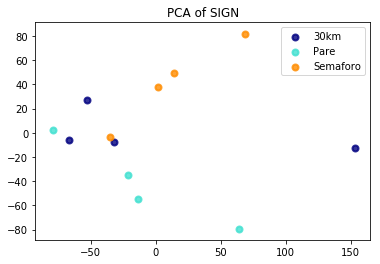

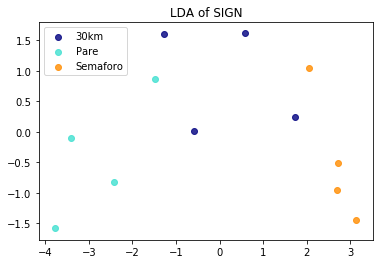

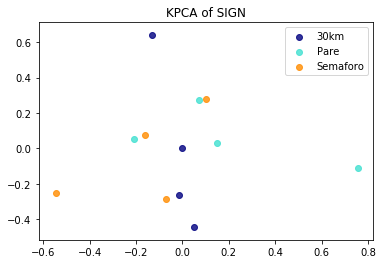

In [38]:
reduction([kp1,kp2,kp3,kp4,kp5,kp6,kp7,kp8,kp9,kp10,kp11,kp12])

Listo


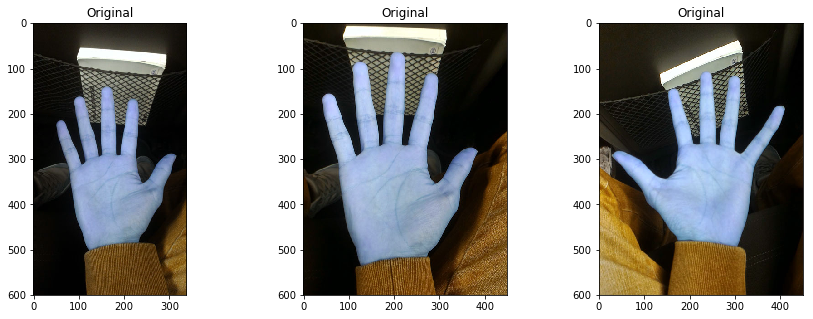

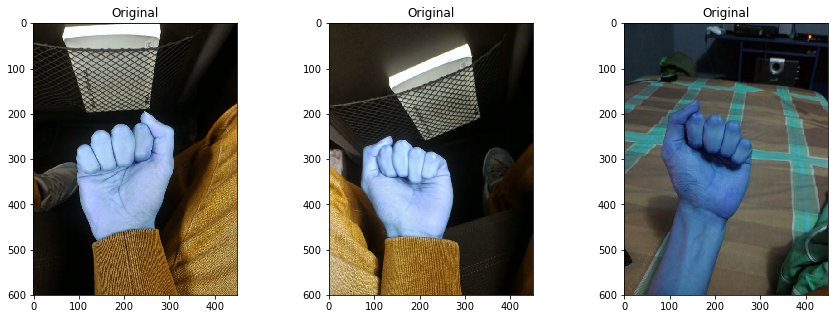

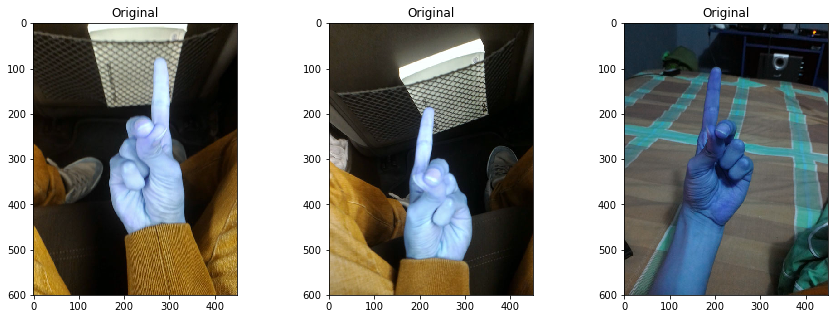

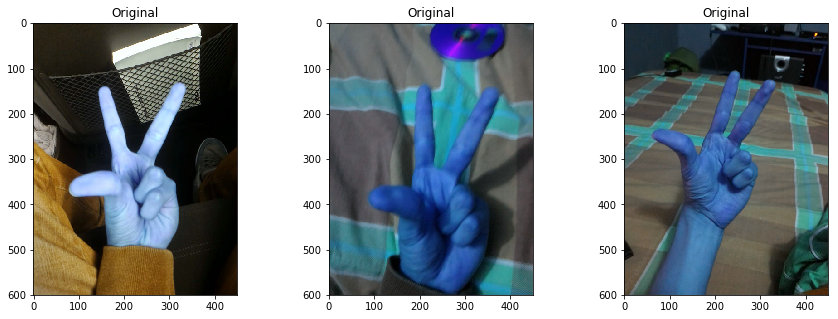

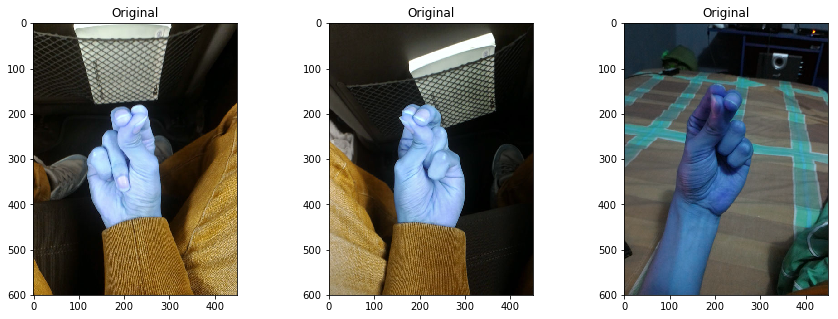

In [10]:
b1 = cv2.imread('Fig/Hand/b1.jpg',1)
b2 = cv2.imread('Fig/Hand/b2.jpg',1)
b3 = cv2.imread('Fig/Hand/b3.jpg',1)
f1 = cv2.imread('Fig/Hand/f1.jpg',1)
f2 = cv2.imread('Fig/Hand/f2.jpg',1)
f3 = cv2.imread('Fig/Hand/f3.jpg',1)
l1 = cv2.imread('Fig/Hand/l1.jpg',1)
l2 = cv2.imread('Fig/Hand/l2.jpg',1)
l3 = cv2.imread('Fig/Hand/l3.jpg',1)
r1 = cv2.imread('Fig/Hand/r1.jpg',1)
r2 = cv2.imread('Fig/Hand/r2.jpg',1)
r3 = cv2.imread('Fig/Hand/r3.jpg',1)
m1 = cv2.imread('Fig/Hand/m1.jpg',1)
m2 = cv2.imread('Fig/Hand/m2.jpg',1)
m3 = cv2.imread('Fig/Hand/m3.jpg',1)

print "Listo"
plt.figure(1,figsize=(15,5))
plt.subplot(131), plt.imshow(b1), plt.title('Original')
plt.subplot(132), plt.imshow(b2, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(133), plt.imshow(b3, cmap=plt.cm.gray), plt.title('Original')
plt.show()
plt.figure(2,figsize=(15,5))
plt.subplot(131), plt.imshow(f1, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(132), plt.imshow(f2, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(133), plt.imshow(f3, cmap=plt.cm.gray), plt.title('Original')
plt.show()
plt.figure(3,figsize=(15,5))
plt.subplot(131), plt.imshow(l1, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(132), plt.imshow(l2, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(133), plt.imshow(l3, cmap=plt.cm.gray), plt.title('Original')
plt.show()
plt.figure(4,figsize=(15,5))
plt.subplot(131), plt.imshow(r1, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(132), plt.imshow(r2, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(133), plt.imshow(r3, cmap=plt.cm.gray), plt.title('Original')
plt.show()
plt.figure(5,figsize=(15,5))
plt.subplot(131), plt.imshow(m1, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(132), plt.imshow(m2, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(133), plt.imshow(m3, cmap=plt.cm.gray), plt.title('Original')
plt.show()

In [11]:
points=[]
lower = np.array([0, 48, 80], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8")
gestures=["b","f","l","r","m"]
for gesture in gestures:
    for addr in range(3):  
        img1 = cv2.imread("Fig/"+gesture+str(addr+1)+".jpg",1);
        img1=cv2.GaussianBlur(img1,(5,5),0)
        converted = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

        fgmask = cv2.inRange(converted, lower, upper)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

        im,contours, hierarchy = cv2.findContours(fgmask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        if len(contours)!=0:
                max_area=0
                for i in range(len(contours)):
                    cnt1=contours[i]
                    area = cv2.contourArea(cnt1)
                    if(area>max_area):
                        max_area=area
                        ci=i
                cnt1=contours[ci]
                hull = cv2.convexHull(cnt1)
                moments = cv2.moments(cnt1 )            
        points.append(cv2.HuMoments(moments).flatten())
print "Listo"

Listo


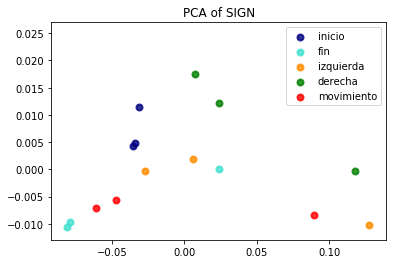

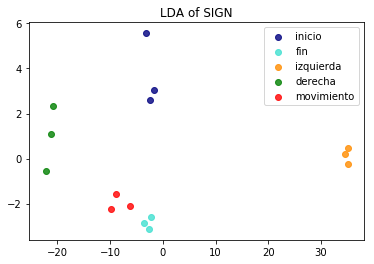

In [12]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def reduction_PCA1(points):
    X = []
    y = np.array([0,0,0,1,1,1,2,2,2,3,3,3,4,4,4])
    target_names = ["inicio","fin","izquierda","derecha","movimiento"]
    data = []
    for i in range(len(points)):
        for j in range(7):
            data.append(points[i][j])
        X.append(data)
        
        data = []
        
        
    X = np.array(X)
    pca = PCA(n_components=2)
    X_r = pca.fit(X).transform(X)
    
    lda = LinearDiscriminantAnalysis(n_components=2)
    X_r2 = lda.fit(X, y).transform(X)
    
    plt.figure()
    colors = ['navy', 'turquoise', 'darkorange','green','red']
    lw = 2
    
    
    for color, i, target_name in zip(colors, [0, 1, 2,3,4], target_names):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA of SIGN')
    
    plt.figure()
    for color, i, target_name in zip(colors, [0, 1, 2,3,4], target_names):
        plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('LDA of SIGN')
reduction_PCA1(points)